In [1]:
import re

from google.cloud import storage
from io import BytesIO

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.style.use('bmh')

## Ingest Data

In [3]:
client = storage.Client()

In [4]:
bucket = client.get_bucket('ames-house-dataset')

In [5]:
def retrieve_file(file_name, gs_bucket):
    blob = storage.Blob(file_name, gs_bucket)
    content = blob.download_as_string()
    return content

def display_description(field_name, description):
    print(re.search(re.escape(field_name) + r':.+\n\n(.+\n)+', description)[0])

In [6]:
train = pd.read_csv(BytesIO(retrieve_file('train.csv', bucket)), index_col=0)

In [7]:
desc = retrieve_file('data_description.txt', bucket).decode('utf-8')

## Identify Features With Missing Values

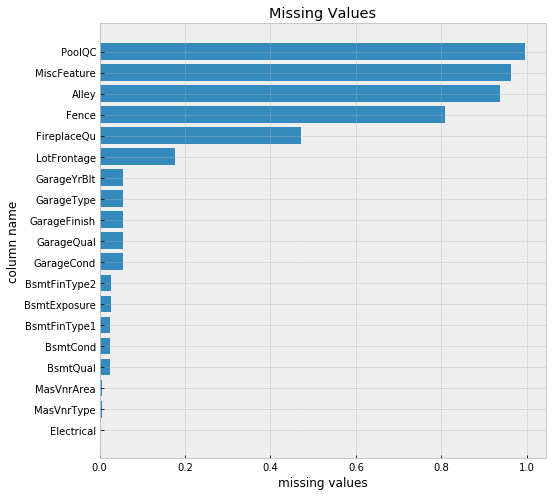

In [8]:
fig = plt.figure(figsize=(8, 8))
missing_values = train.isna().sum() / len(train)
to_plot = missing_values[missing_values > 0].sort_values()
plt.barh(to_plot.index, to_plot.values)
plt.xlabel('missing values')
plt.ylabel('column name')
plt.title('Missing Values')
plt.show()

In [9]:
display_description('LotFrontage', desc)

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet



In [10]:
features_missing_values = missing_values[missing_values>0.4].index.to_list()

In [11]:
train.drop(features_missing_values, axis=1, inplace=True)